# Introduction to Data Science 
# Lecture 18: Clustering 1
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecture, we will introduce clustering, an **unsupervised** learning technique. We'll cover the following topics:
* supervised vs. unsupervised learning
* clustering 
* k-means method

Recommended Reading: 
* G. James, D. Witten, T. Hastie, and R. Tibshirani, An Introduction to Statistical Learning, Ch. 10.1 and 10.3. [digitial version available here](http://www-bcf.usc.edu/~gareth/ISL/)
* J. Grus, Data Science from Scratch, Ch. 19
* [scikit-learn documentation on clustering](http://scikit-learn.org/stable/modules/clustering.html)

## Supervised vs unsupervised learning

In this course, we've already discussed regression and classification, which are examples of [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) tasks. In supervised learning, you "learn" a function, $y = f(x)$, that maps an input, $x$, to an output or label, $y$, based on example input-output data. In regression, $x$ is a feature vector and $y$ is a real-valued number. In classification, $x$ is a feature vector and $y$ is a discrete variable, e.g., an integer or class. 

One difficulty of supervised learning is that labels can be expensive or impossible to obtain!

In [unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning), one tries to learn hidden structure from "unlabeled" data. Examples of unsupervised learning tasks include 
* Clustering
* Dimensionality reduction
* Density estimation 
* Anomaly detection
* ... 

In this lecture, we'll focus on clustering. 

## Clustering

[Clustering](https://en.wikipedia.org/wiki/Cluster_analysis) is the task of discovering unknown subgroups in data, which we call *clusters*.  In other words, the **goal** is to partition the datset into clusters where ‘similar’ items are in the same cluster and ‘dissimilar’ items are in different clusters. 

**Examples:**
* Social Network Analysis: Clustering can be used to find communities
* Ecology: cluster organisms that share attributes into species, genus, etc...
* Handwritten digits where the digits are unknown

**Question:** What is the difference between *Clustering* and *Classificaiton*? 

There are several **challenges** to clustering:
* We must make sense of what it means for two items in the dataset to be *similar* to one another. In other words, we need to develop a "distance" or a "similarity" function and there are many different choices: Euclidean distance, Pearson correlation, Manhattan distance, weighted distances, Jaccard coefficient, ... 
* Since the data is unlabelled, there is no "ground truth" to compare to. It is difficult to evaluate the accuracy of clustering methods. In particular, we can't simply do cross validation. 

There are several **methods** for clustering. We'll discuss: 
* k-means clustering
* hierarchical clustering 

## The k-means clustering method

**Data:**  A collection of points $\{x_i\}$, for $i = 1,\ldots n$, where $x_i\in \mathbb R^d$. 

In [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering), one tries to find $k$ *centers*, $\{\mu_\ell\}$, $\ell = 1,\ldots k$, and assign each point $x$ to a *cluster* $C_\ell$ with center $\mu_\ell$, as to minimize the *total intra-cluster distance* 
$$
\arg\min_{\mu, C} \sum_{\ell=1}^k \sum_{x_i \in C_\ell} \| x_i - \mu_\ell\|^2. 
$$
Here, $\mu_\ell$ is the mean of points in $C_\ell$. The total intra-cluster distance is the total squared Euclidean distance from each point to the center of its cluster. It's a measure of the varaince or internal coherence of the clusters. 


## Lloyd's Algorithm

$$
\arg\min_{\mu, C} \sum_{\ell=1}^k \sum_{x_i \in C_\ell} \| x_i - \mu_\ell\|^2. 
$$

In practice, k-Means is implemented using [Lloyd's algorithm](https://en.wikipedia.org/wiki/Lloyd%27s_algorithm). 

**Input:** set of points $x_1,\ldots, x_n$ and an integer $k$ (# clusters)

Pick $k$ starting points as centers $\mu_1, \ldots, \mu_k$.

** while** not converged:
1. Assign each point $x_i$, to the cluster $C_\ell$ with closest center $\mu_\ell$. 
2. For each cluster $C_\ell$, compute a new center, $\mu_\ell$, by taking the mean of all $x_i$ assigned to cluster $C_\ell$, i.e., 
$$
\mu_\ell = \frac{1}{|C_\ell|}\sum_{x_i \in C_\ell} x_i
$$

### Comments
1. How do we assign each point $x_i$, to the closest center, $C_\ell$? 
 - For every $\mu_\ell$, we calculate the distance $d(x_i, \mu_\ell)$. 
 - Then we assign $x_i$ to cluster $C_\ell$ with the smallest distance.
 
+ How do we pick $k$ starting points as centers $\mu_1, \ldots \mu_k$? Ideas:
 - randomly
 - points that are far apart? 
 - manually? 
 
+  What does *not converged* mean? Ideas:
 - no point has changed cluster
 - distance between old and new centroid below threshold
 - number of max iterations reached
+ How to choose the parameter $k$? Ideas:
 - visual comparison
 - compare the value of the total intra-cluster distance for different values of $k$

## k-means method demo
There is a nice visualization of the k-means method by Naftali Harris here:

[visualizing-k-means-clustering](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) 
        
![k-means clustering](k-means-fig.png)

## Performance and properties of k-means

* The performance is $O(n*k*d*i)$ where 
 - n is the number of items,
 - k is the number of clusters
 - d is the number of dimensions of the feature vectors
 - i is the number of iterations needed until convergence. 
 
  For data that has well-defined clusters, $i$ is typically small. In practice, the $k$-means algorithm is very fast. 

* Lloyds algorithm finds a *local optimum*, not necessarily the *global optimum*

  Since the algorithm is fast, it is common to run the algorithm multiple times and pick the solution with the smallest total intra-cluster distance, 
$$
\sum_{\ell=1}^k \sum_{x_i \in C_\ell} \| x_i - \mu_\ell\|^2. 
$$

* The total intra-cluster distance decreases at every iteration of Lloyd's algorithm

* The total intra-cluster distance decreases with larger $k$

## K-Means with SciKit Learn

SciKit learn has a nice [implementaton of the k-means method](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), which we'll use to cluster various artificial datasets first.

In [1]:
import numpy as np

from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])


## A first example

First, we'll create data using a function that generates [gaussian blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs).

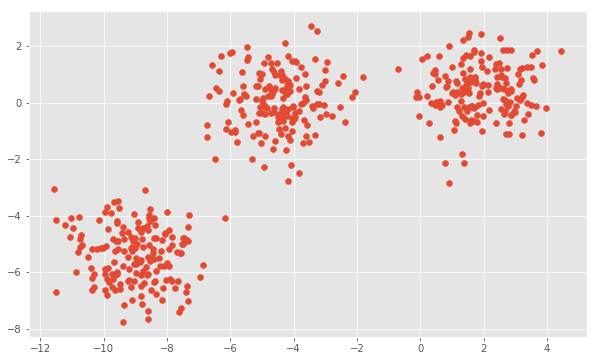

In [2]:
# make_blobs generates gaussian blobs, we create 3 blobs
n_samples = 500
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers=3, random_state=random_state)

# plot data
plt.scatter(X[:, 0], X[:, 1],  marker="o");

Now we run the scikit-learn KMeans implementation with function parameters 
* `n_clusters`: $k=3$ clusters
* `n_init`: only one initialization 
* `init`: random initialization 
* `max_iter`: only one iteration 

**Note:** that this is the dumbest possible version of k-means! This is essentially just random initialization + assign closest points.

The clusters are plotted using color. 

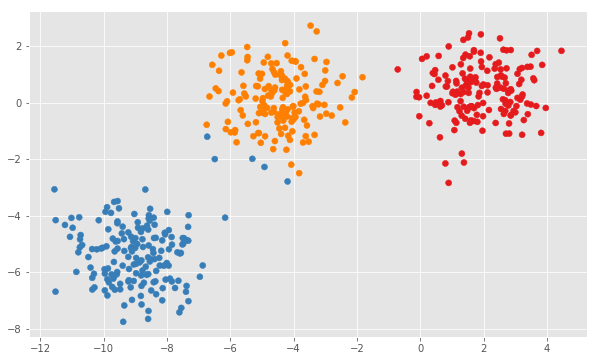

In [3]:
y_pred = KMeans(n_clusters=3, n_init=1, init='random', max_iter=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

The results are highly dependent on the random initialization of the centroids. 

If we set the maximum number of iterations to 5, we already see some improvement.

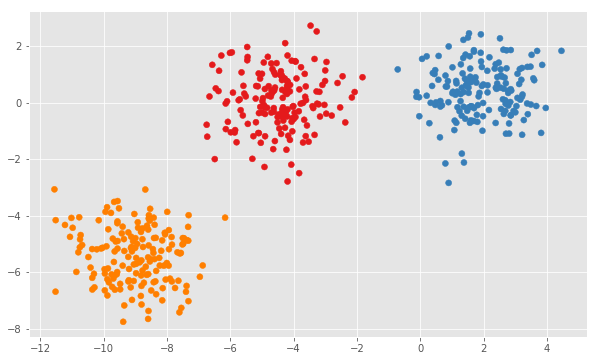

In [4]:
y_pred = KMeans(n_clusters=3, n_init=1, init='random', max_iter=5).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);


### More function arguments

* `n_init`: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. Defaults to 10.

* `init`
 - `random` picks k random points for inital cluster seeds
 - `k-means++` (the default) uses the [k-means++](https://en.wikipedia.org/wiki/K-means%2B%2B) [algorithm](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf) to"spread out" the inital seeds: the first cluster center is chosen uniformly at random from the data points that are being clustered, after which each subsequent cluster center is chosen from the remaining data points with probability proportional to its squared distance from the point's closest existing cluster center.

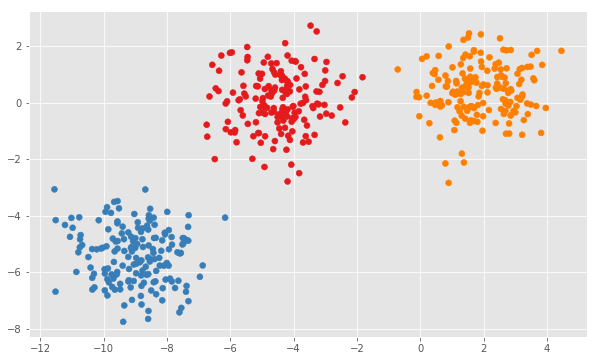

In [5]:
# For this simple dataset using k-means++ initalization and 10 runs of k-means,
# even a max_iter of 1 yields good results.
y_pred = KMeans(n_clusters=3, max_iter=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);


## More complicated datasets

The total intra-cluster distance, however, makes the assumption that clusters are 
* convex
* isotropic (uniform in all orientations). 

Up to now, we've applied the algorithm only to nice, Gaussian blobs of equal size. Let's see what the algorithm does for point sets that 
* vary in size
* vary in variance
* are anisotropic 
* are non-convex.
 
### Varying Size

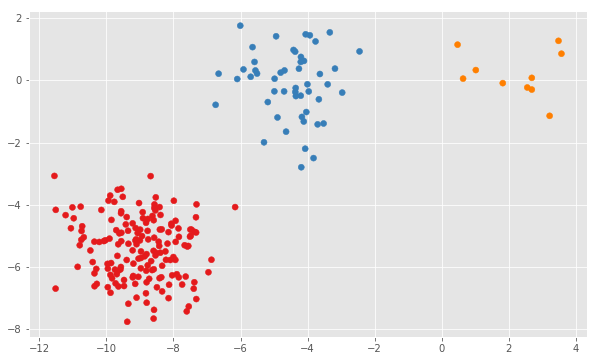

In [6]:
X, y = make_blobs(n_samples=n_samples, centers=3, random_state=random_state)

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:200], X[y == 1][:50], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3).fit_predict(X_filtered)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred,  marker="o", cmap=cmap);

K-Means does fine for unevenly sized blobs. 

### Anisotropic point clouds

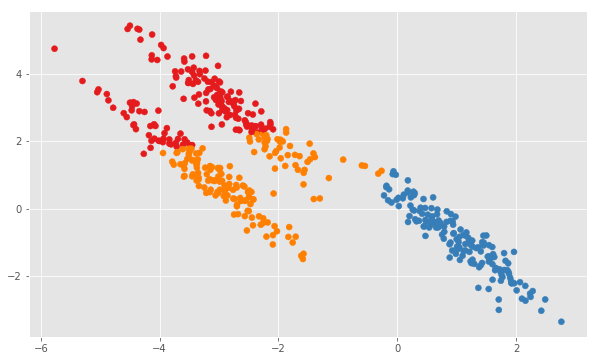

In [7]:
# Anisotropically distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

y_pred = KMeans(n_clusters=3).fit_predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred,  marker="o", cmap=cmap); 


Here we see a clear weakness of k-means, it doesn't work well for anisotropic point clouds. 

### Non-convex point clouds

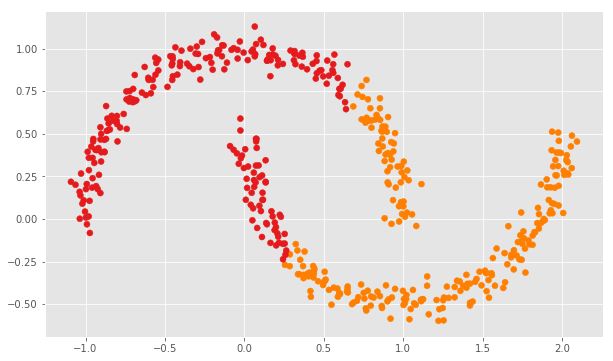

In [8]:
X_moons, y = make_moons(n_samples=n_samples, noise=.05)

y_pred = KMeans(n_clusters=2).fit_predict(X_moons)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_pred,  marker="o", cmap=cmap);

The k-means method also doesn't work well for non-convex point clouds. 


## Choosing k in the k-means method
$k$-means is very sensitive to the choice of the parameter, $k$

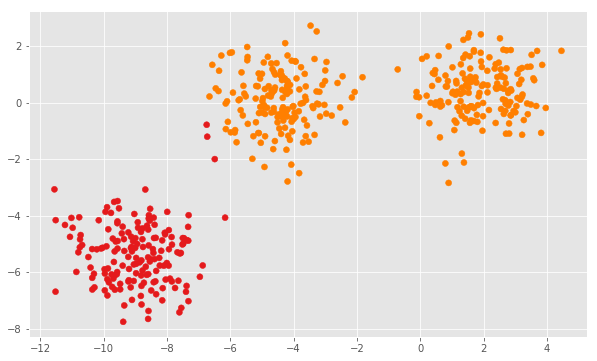

In [9]:
X, y = make_blobs(n_samples=n_samples, centers=3, random_state=random_state)
y_pred = KMeans(n_clusters=2).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

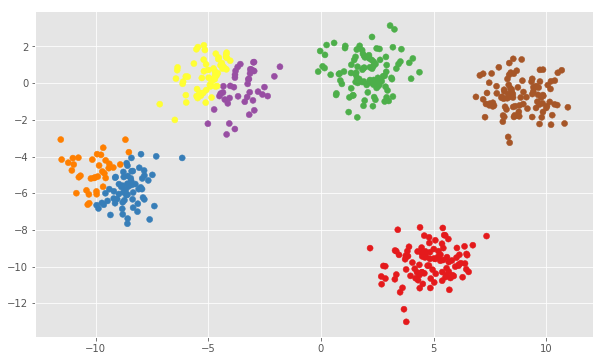

In [10]:
X, y = make_blobs(n_samples=n_samples, centers=5, random_state=random_state)
y_pred = KMeans(n_clusters=7).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

**How do you choose K?** Ideas:

1. Visual comparison
+ Looking for at which $k$ the total intra-cluster distance tapers off. 
+ [Silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

The first method is useful when the feature vectors are two dimensional, but it's difficult to visualize data in higher dimensions. Let's consider the other two ideas.

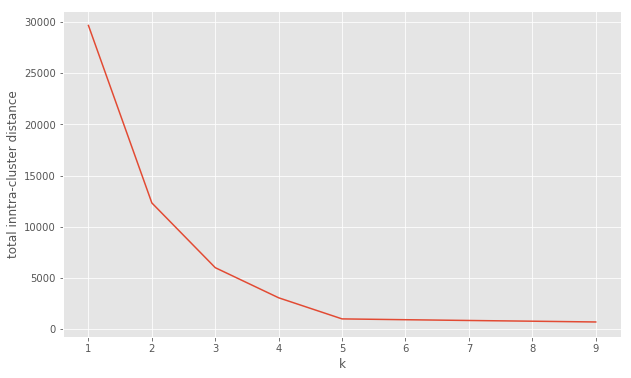

In [11]:
# clustering for k = 1 to k = 10
ks = range(1,10)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(X)
    scores.append(-model.score(X))

plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

We can see that the inertia is large for $k = 1$ and decreases as we increase $k$, until $k=5$, after which it tapers of and gets only marginally smaller. This indicates that $k=5$ is a good choice.

Note: the scikit learn implementation returns negative values ("opposites of the k-means objective") as scores here.

## Silhouette Analysis
Another choice for choosing the parameter $k$ in $k$-means is [silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)


Here, we measure the distance between points in one cluster and points in neightboring clusters. 
of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. 



+ [`silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html): The Silhouette Score is the mean Silhouette Coefficient of all samples. The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is 
$$ \frac{b - a}{\max\{a, b\} }.
$$
This measure has a range of [-1, 1] with  1 = good. 

There is a nice plot, called a *silhouette plot* which shows the Silhouette Coefficient for each sample. 

For n_clusters = 2 The average silhouette_score is : 0.533649724737


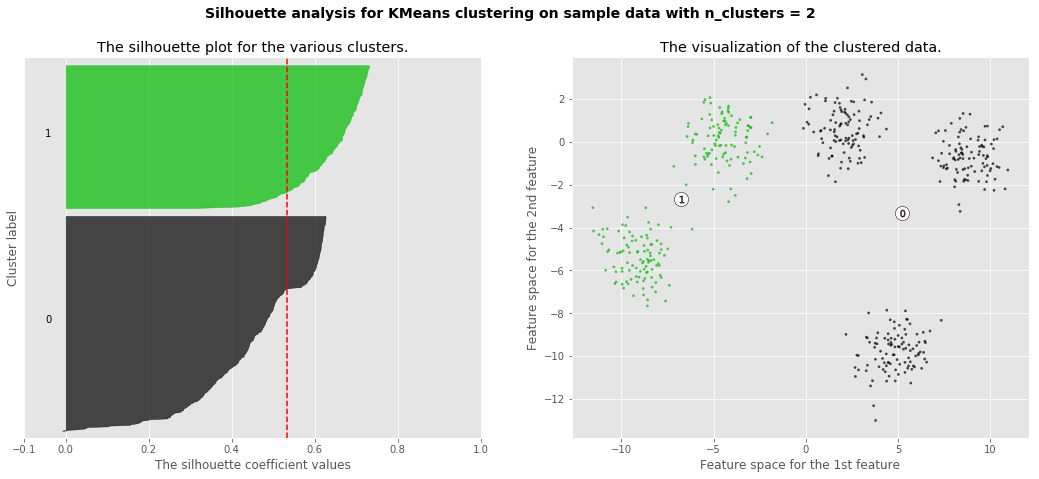

For n_clusters = 3 The average silhouette_score is : 0.627286424151


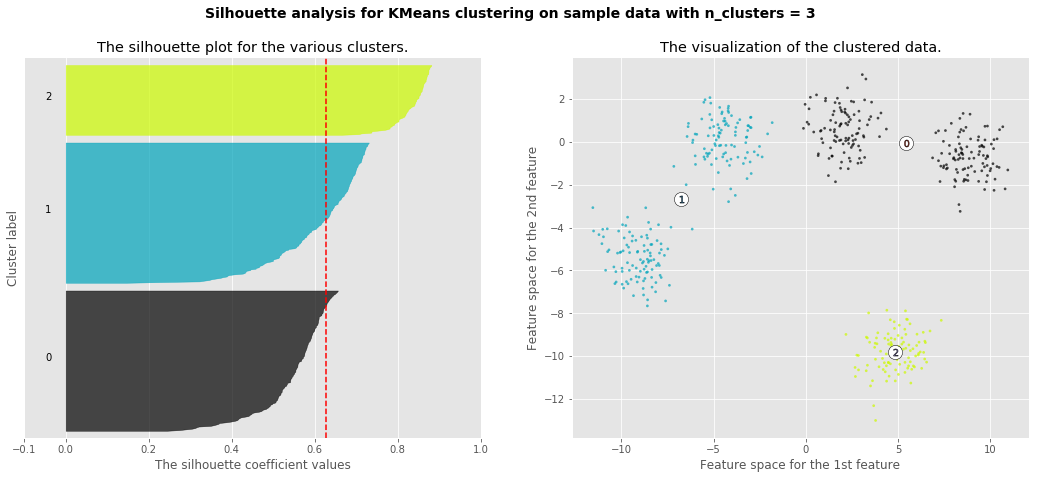

For n_clusters = 4 The average silhouette_score is : 0.648550204293


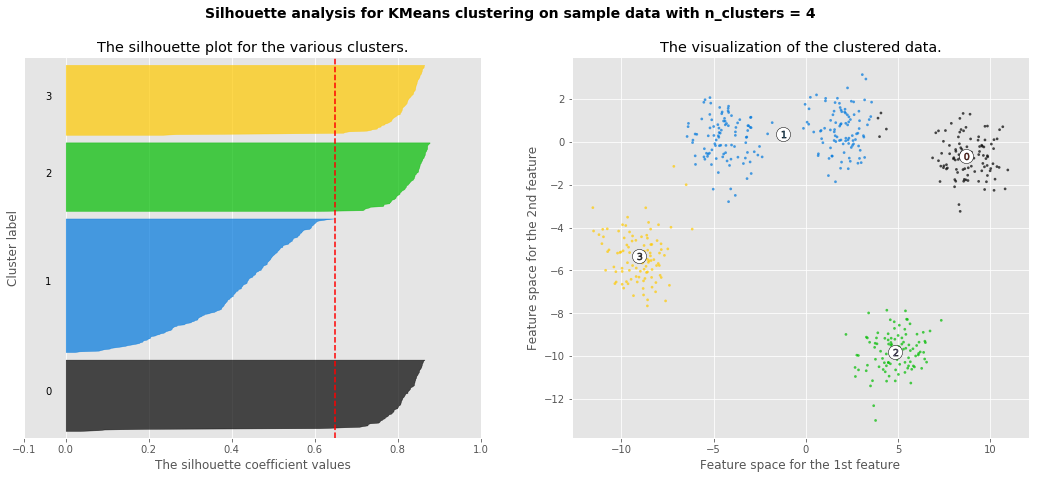

For n_clusters = 5 The average silhouette_score is : 0.745466969217


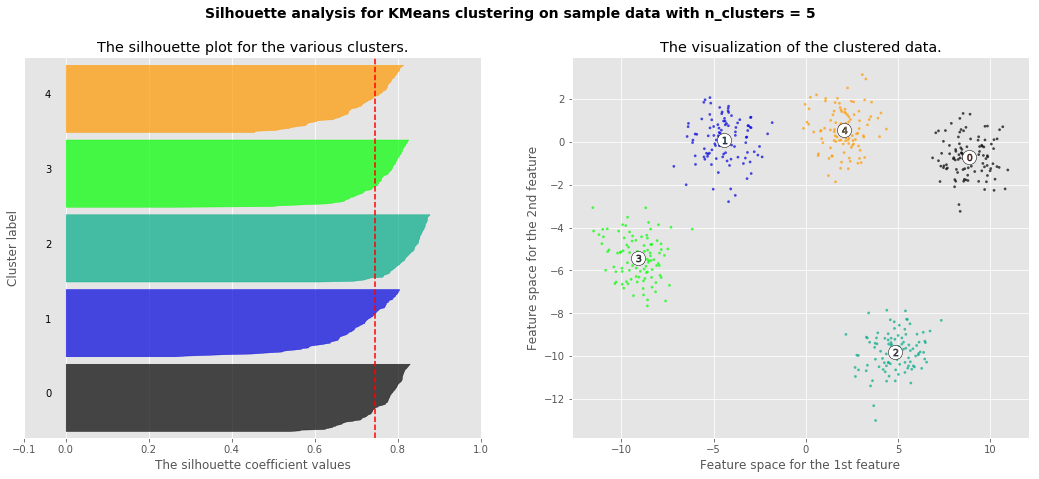

For n_clusters = 6 The average silhouette_score is : 0.666448689625


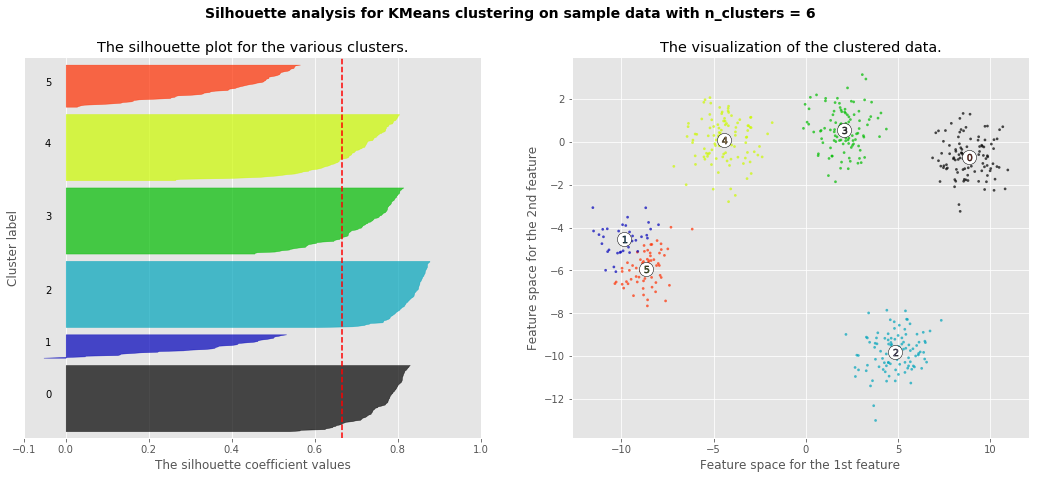

In [12]:
range_n_clusters = [2, 3, 4, 5, 6]


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## Example: Iris dataset

We're going to look at how well k-means does on a higher dimensional example, the well-known Iris dataset. 

First, let's load the dataset and look at the first two dimensions. 

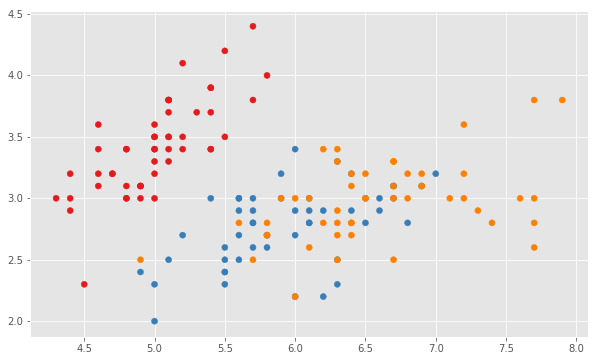

In [13]:
iris = load_iris()
X = iris.data
Y_iris_gt = iris.target

plt.scatter(X[:, 0], X[:, 1], c=Y_iris_gt,  marker="o", cmap=cmap);

This isn't very discernible in just two dimensions. We'll see how we can better plot this once we've talked about Priciple Component Analysis (PCA). 

Now let's run a clustering algorithm using all features (dimensions) and plot the results. 

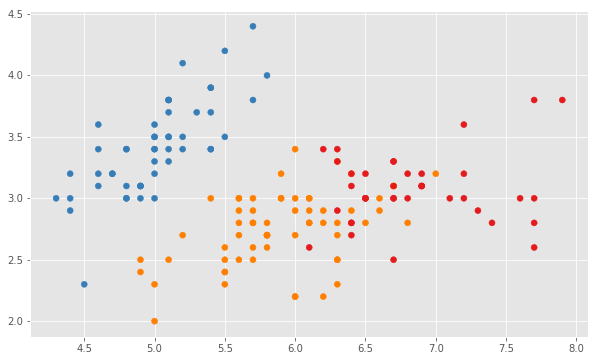

In [14]:
y_iris_pred = KMeans(n_clusters=3,n_init=100).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_iris_pred,  marker="o", cmap=cmap);

These clusters looks similar to the ground truth labels.

How do we evaluate the qualitiy of the clusters? 

Just comparing the labels is difficult, since permutations of the labels shouldn't matter.

In [15]:
print(y_iris_pred)
print(Y_iris_gt)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Evaluating cluster quality with known ground-truth labels

1. [`homogeneity_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html): Homogeneity metric of a cluster labeling given a ground truth. A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
+ [`completeness_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html): A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
+ [`v_measure_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html): The V-measure is the harmonic mean between homogeneity and completeness:
$$
v = 2 * (homogeneity * completeness) / (homogeneity + completeness)
$$
+ [`homogeneity_completeness_v_measure`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html): Compute the homogeneity, completeness, and v-Measure scores at once.
+ Confusion matrix and purity score


In [16]:
metrics.homogeneity_completeness_v_measure(Y_iris_gt,y_iris_pred)

(0.75148540219883375, 0.76498615144898152, 0.7581756800057784)

The homogeneity, completeness, and v-meausre scores are all approximately 76%. This is ok, but not great. 

## Other clustering algorithms and ideas
There are many clustering algorithms beyond $k$-means. 

1. Partitional Algorithms
 - divide data into set of bins
 - bins either manually set (e.g., k-means) or automatically determined (e.g., affinity propagation)

+ Hierarchical Algorithms
 - Produce a *dendrogram* or "similarity tree", 
 - clusters can be produced by "cutting" the dendrogram

+ Bi-Clustering
 - Clusters dimensions & records

+ Fuzzy clustering
 - probabilistic cluster assignment allows occurrence of elements in multiples clusters
 
Many variants of these ideas are implemented in scikit-learn. [Here](http://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods)  is an overview. 